In [ ]:
import pandas as pd
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

df = pd.DataFrame(columns=['Cholesterol', 'Diabetes', 'Family History', 'Hypertension', 'Physical Inactivity', 'Risk Score'])

feature_values = np.arange(-2, 3, 1)
combinations = pd.DataFrame(np.array(np.meshgrid(feature_values, feature_values, feature_values, feature_values, feature_values)).T.reshape(-1, 5),
                             columns=['Cholesterol', 'Diabetes', 'Family History', 'Hypertension', 'Physical Inactivity'])

# Calculate the risk score for each combination
combinations['Risk Score'] = combinations.apply(lambda row: sigmoid((3 * row['Cholesterol'] + 4 * row['Diabetes'] + 2 * row['Family History'] + 4 * row['Hypertension'] + 3 * row['Physical Inactivity']) / 8), axis=1)


df = pd.concat([df, combinations], ignore_index=True)

df.to_excel('risk_scores.xlsx', index=False, engine='openpyxl')


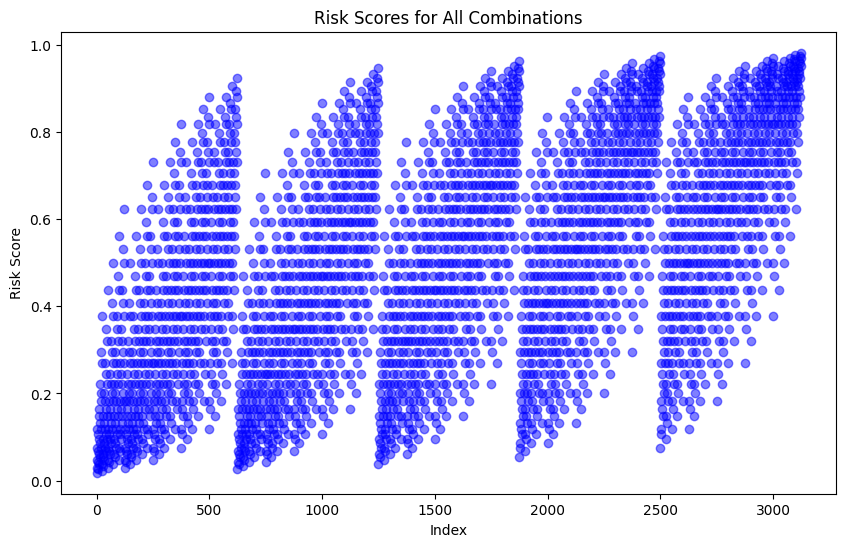

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('risk_scores_data.xlsx')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.index, df['risk_score'], c='blue', alpha=0.5)
ax.set_xlabel('Index')
ax.set_ylabel('Risk Score')
ax.set_title('Risk Scores for All Combinations')
plt.show()

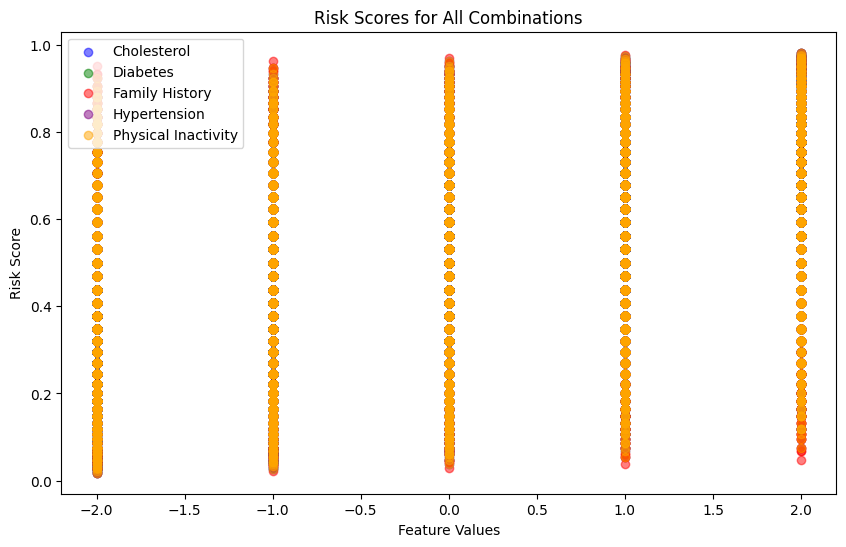

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('risk_scores_data.xlsx')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['cholesterol'], df['risk_score'], c='blue', alpha=0.5, label='Cholesterol')
ax.scatter(df['diabetes'], df['risk_score'], c='green', alpha=0.5, label='Diabetes')
ax.scatter(df['family_history'], df['risk_score'], c='red', alpha=0.5, label='Family History')
ax.scatter(df['hypertension'], df['risk_score'], c='purple', alpha=0.5, label='Hypertension')
ax.scatter(df['physical_inactivity'], df['risk_score'], c='orange', alpha=0.5, label='Physical Inactivity')

ax.set_xlabel('Feature Values')
ax.set_ylabel('Risk Score')
ax.set_title('Risk Scores for All Combinations')
ax.legend()
plt.show()